In [3]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/Abdul/Downloads/Attrition data.csv'

data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [4]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64


In [6]:
# Fill missing values in numeric columns with the mean
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing values in categorical (non-numeric) columns with the most frequent value (mode)
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# The DataFrame 'data' now has missing values handled for both numeric and categorical columns.


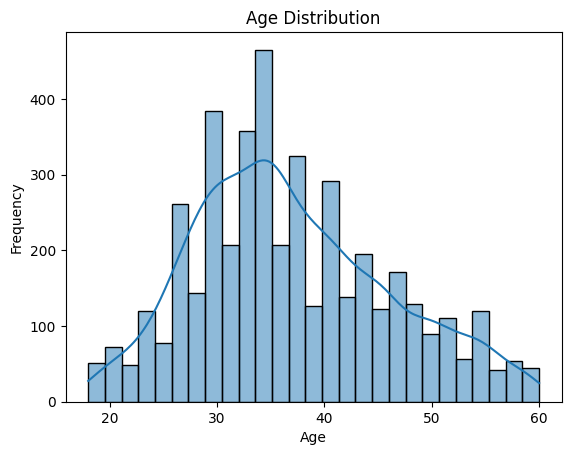

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

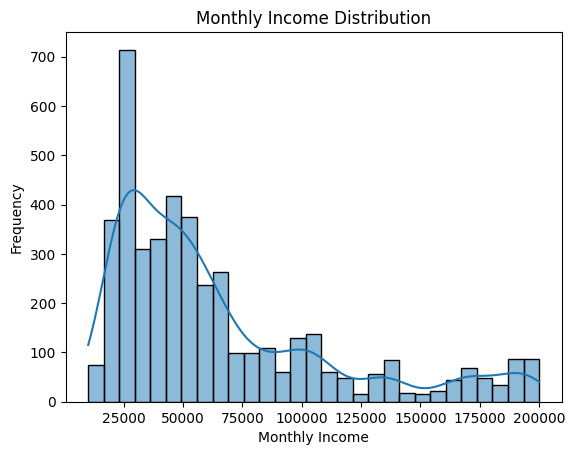

In [9]:
# Monthly Income distribution
sns.histplot(data['MonthlyIncome'], kde=True)
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

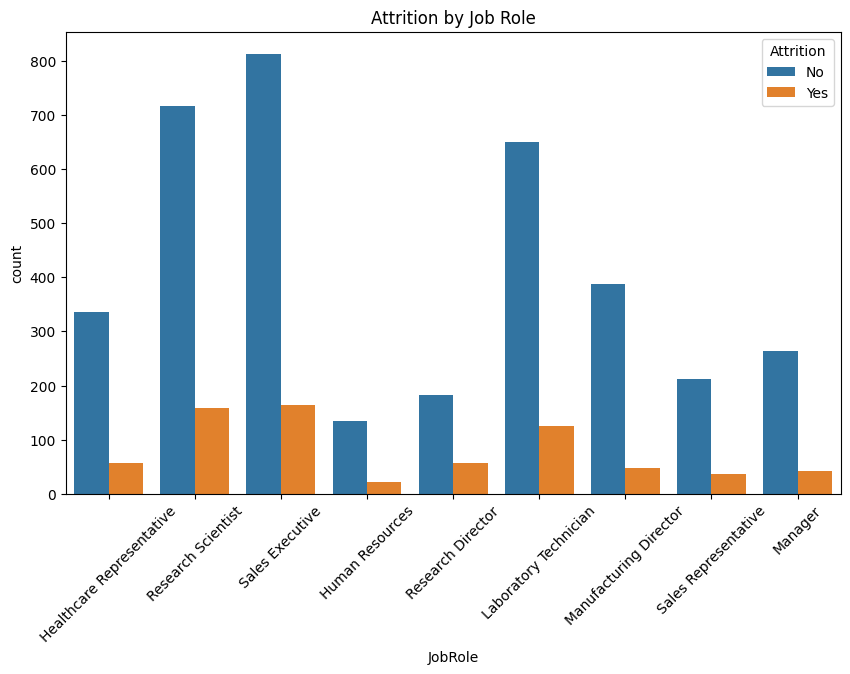

In [10]:
# Count of Attrition by Job Role
plt.figure(figsize=(10, 6))
sns.countplot(x='JobRole', hue='Attrition', data=data)
plt.title('Attrition by Job Role')
plt.xticks(rotation=45)
plt.show()

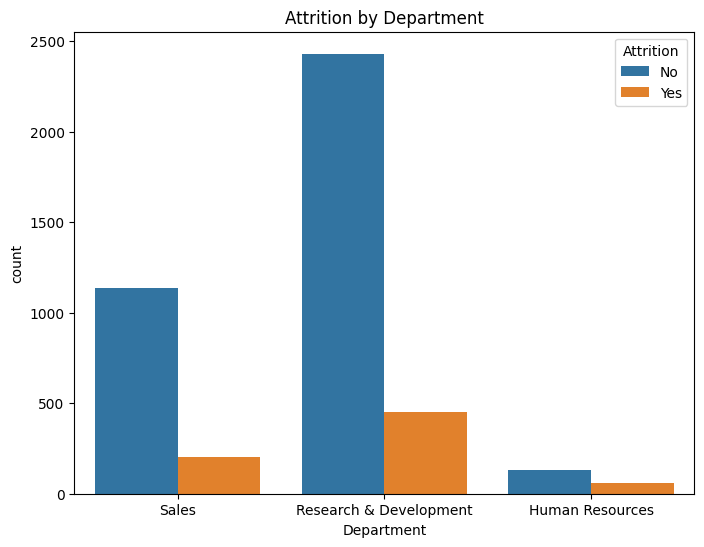

In [11]:
# Count of Attrition by Department
plt.figure(figsize=(8, 6))
sns.countplot(x='Department', hue='Attrition', data=data)
plt.title('Attrition by Department')
plt.show()

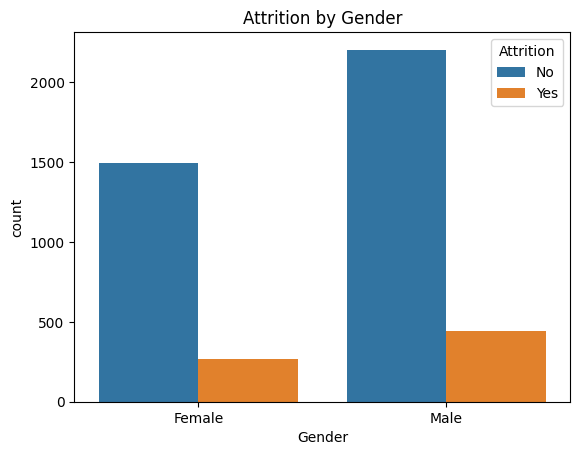

In [12]:
# Attrition rate by Gender
sns.countplot(x='Gender', hue='Attrition', data=data)
plt.title('Attrition by Gender')
plt.show()

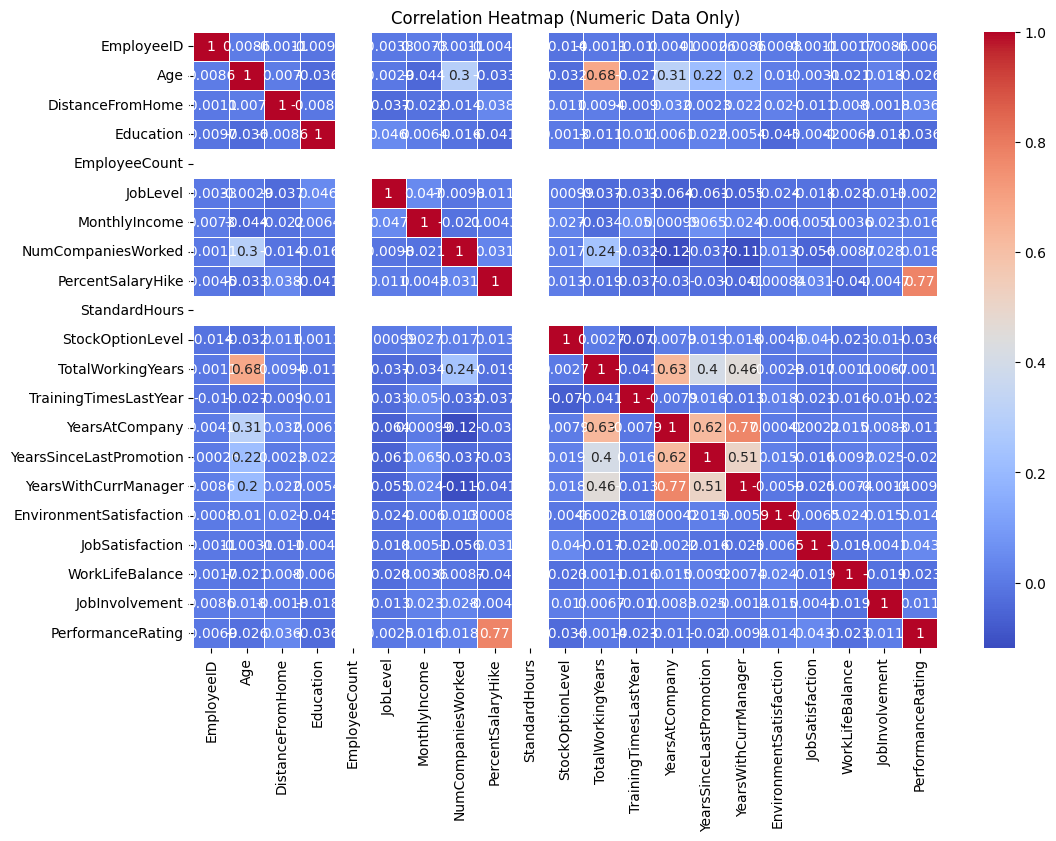

In [14]:
# Select only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot the correlation heatmap with only numeric data
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Data Only)')
plt.show()

In [15]:
# Create age groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Group employees by income level
income_bins = [0, 3000, 6000, 9000, 12000, 15000]
income_labels = ['Low', 'Lower Middle', 'Middle', 'Upper Middle', 'High']
data['IncomeLevel'] = pd.cut(data['MonthlyIncome'], bins=income_bins, labels=income_labels)

In [18]:
# Export the processed dataset for use in Power BI
data.to_csv('C:/Users/Abdul/Downloads/processed_attrition_data.csv', index=False)
